In [23]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

In [4]:
data1 = sio.loadmat('C:\\Users\\Administrator\\Desktop\\ex7data2.mat')
data1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

In [14]:
x = data1['X']

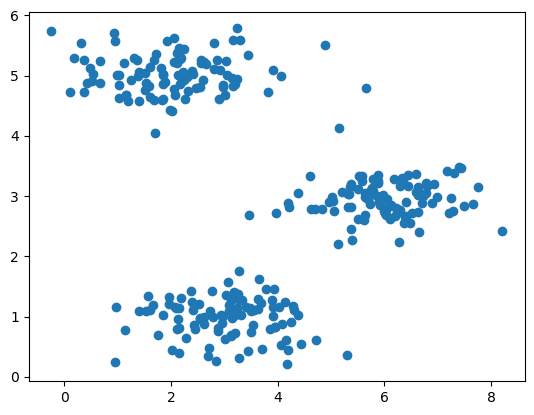

In [16]:
def plot_data(x):
    plt.scatter(x[:,0],x[:,1])
    plt.show()

plot_data(x)

1.将点进行分类

In [39]:
def classify(x,centers):
    idx = []
    for i in range(len(x)):
        # np.linalg.norm用于计算向量或矩阵的范数
        ''' L1范数（ord=1）：向量元素绝对值的和
            L2范数（ord=2，默认）：向量的欧几里得长度（即勾股定理）
            无穷范数（ord=np.inf）：向量元素绝对值的最大值
            负无穷范数（ord=-np.inf）：向量元素绝对值的最小值
            Frobenius范数（ord=‘fro’）：矩阵元素的平方和的平方根（仅对矩阵有效）'''
        dist = np.linalg.norm((x[i] - centers),axis=1)
        id_i = np.argmin(dist)
        idx.append(id_i)
    return np.array(idx)

In [41]:
centers = np.array([[3,3],[6,2],[8,5]])
idx = classify(x,centers)
idx[:3]

array([0, 2, 1], dtype=int64)

2.计算聚类中心点

In [44]:
def find_centers(x,idx,k):
    centers = []
    for i in range(k):
        center_i = np.mean(x[idx==i],axis=0)
        centers.append(center_i)
    return np.array(centers)

In [46]:
find_centers(x,idx,3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

3.进行迭代

In [49]:
def kmeans(x,iters,centers):
    #记录每一次迭代的中心点
    centers_all = []
    centers_all.append(centers)
    new_centers = centers
    for i in range(iters):
        idx = classify(x,new_centers)
        new_centers = find_centers(x,idx,len(new_centers))
        centers_all.append(new_centers)

    return idx,np.array(centers_all)

4.绘制聚类中心的移动轨迹

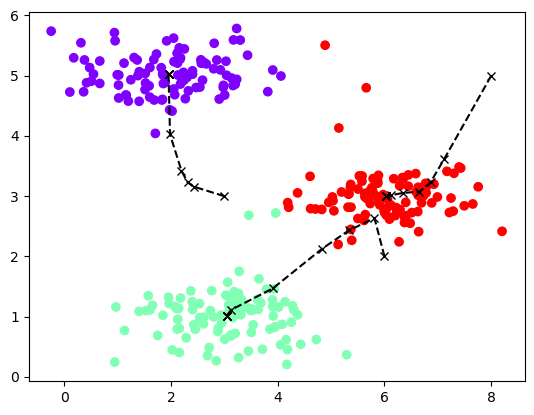

In [57]:
def plot_data(idx,centers):
     plt.figure()
     plt.scatter(x[:,0],x[:,1],c=idx,cmap='rainbow')
     plt.plot(centers[:,:,0],centers[:,:,1],'kx--')
     plt.show()

idx,centers_all = kmeans(x,10,centers)
plot_data(idx,centers_all)

5.探究聚类中心点对结果的影响

In [59]:
def init_centers(x,k):
    index = np.random.choice(len(x),k)
    return x[index]

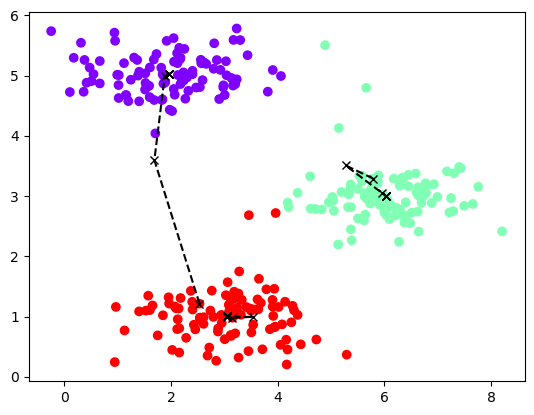

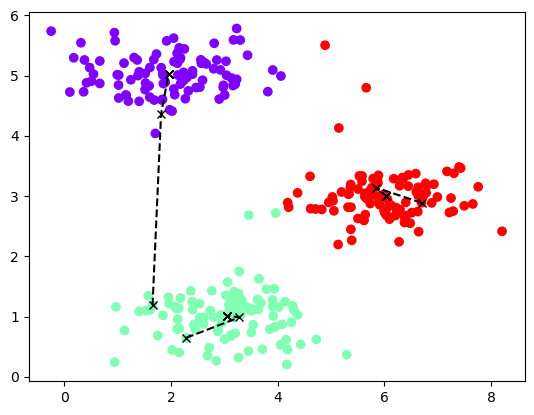

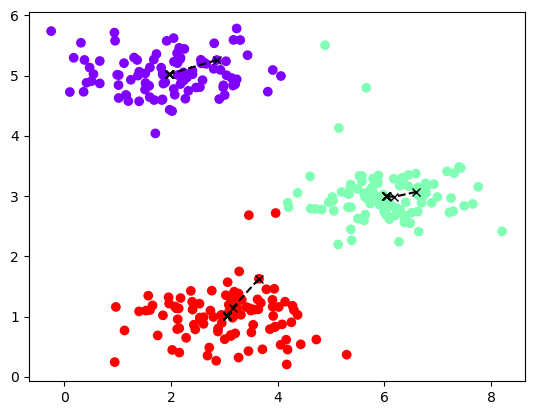

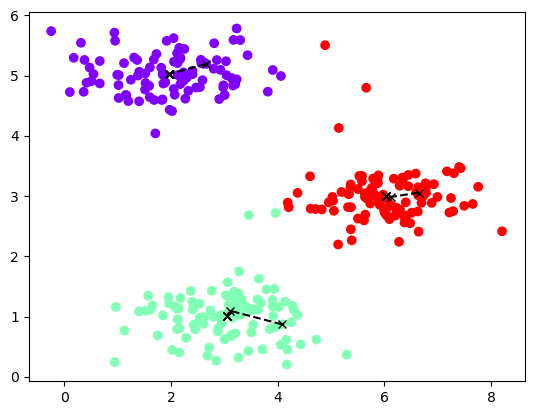

In [65]:
for i in range (4):
    centers = init_centers(x,3)
    idx,centers_all = kmeans(x,10,centers)
    plot_data(idx,centers_all)